In [46]:
"""
*******************************************************************************

Project: RL
File: warehouse_robot_env.ipynb
Author: Hamid Manouchehri
Email: hmanouch@buffalo.edu
Date: Feb 7, 2025

Description:
Checkpoint 1, preparing an RL environment
Environmet Scenario: Warehouse Robot

License:
This script is licensed under the MIT License.
You may obtain a copy of the License at
    https://opensource.org/licenses/MIT

SPDX-License-Identifier: MIT

Disclaimer:
This software is provided "as is", without warranty of any kind, express or
implied, including but not limited to the warranties of merchantability,
fitness for a particular purpose, and noninfringement. In no event shall the
authors be liable for any claim, damages, or other liability, whether in an
action of contract, tort, or otherwise, arising from, out of, or in connection
with the software or the use or other dealings in the software.

*******************************************************************************
"""

'\n*******************************************************************************\n\nProject: RL\nFile: warehouse_robot_env.ipynb\nAuthor: Hamid Manouchehri\nEmail: hmanouch@buffalo.edu\nDate: Feb 7, 2025\n\nDescription:\nCheckpoint 1, preparing an RL environment\nEnvironmet Scenario: Warehouse Robot\n\nLicense:\nThis script is licensed under the MIT License.\nYou may obtain a copy of the License at\n    https://opensource.org/licenses/MIT\n\nSPDX-License-Identifier: MIT\n\nDisclaimer:\nThis software is provided "as is", without warranty of any kind, express or\nimplied, including but not limited to the warranties of merchantability,\nfitness for a particular purpose, and noninfringement. In no event shall the\nauthors be liable for any claim, damages, or other liability, whether in an\naction of contract, tort, or otherwise, arising from, out of, or in connection\nwith the software or the use or other dealings in the software.\n\n******************************************************

In [47]:
!pip install gymnasium matplotlib numpy

In [48]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np

In [35]:
grid = np.zeros((3,3)) #this is how you define a 3x3 grid
print(grid)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


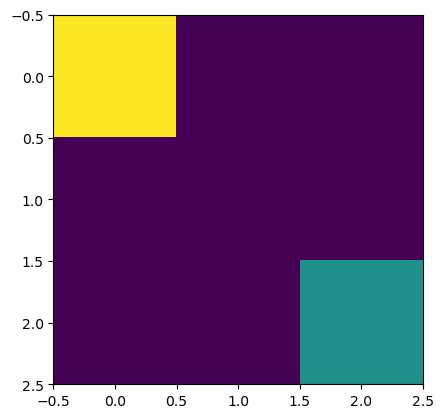

In [36]:
pos1 = [0,0] #start position of our agent
pos2 = [2,2] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [37]:
# Definition of the Grid Environment class.

class GridEnvironment(gym.Env):
    # Attribute of a Gym class that provides info about the render modes
    metadata = { 'render.modes': [] }

    # Initialization function
    def __init__(self):
        # Initializes the class
        # Define action and observation space
        self.observation_space = spaces.Discrete(9)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 5
        
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [2, 2]
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

    # Reset function
    def reset(self, **kwargs):
        # Resets the state of the environment to an initial state
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        info = {}
        
        return observation, info

    # Step function: Contains the implementation for what happens when an
    # agent takes a step in the environment.
    def step(self, action):
        # Executes one timestep within the environment
        # Input to the function is an action
        
        if action == 'down':
            self.agent_pos[0] += 1
            
        if action == 'up':
            self.agent_pos[0] -= 1
            
        if action == 'right':
            self.agent_pos[1] += 1
            
        if action == 'left':
            self.agent_pos[1] -= 1
        
        # Comment this to demonstrate the truncation condition.
        self.agent_pos = np.clip(self.agent_pos, 0, 2)
        
        self.state = np.zeros((3,3))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 1
        
        self.timestep += 1
        
        # Condition to check for termination (episode is over)
        terminated = True if self.timestep >= self.max_timesteps else False
        
        # Condition to check if agent is traversing to a cell beyond the permitted cells
        # This helps the agent to learn how to behave in a safe and predictable manner
        truncated = True if np.all((np.asarray(self.agent_pos) >=0 ) & (np.asarray(self.agent_pos) <= 2)) else False
        
        info = {}
        
        return observation, reward, terminated, truncated, info

    # Render function: Visualizes the environment
    def render(self):
        # Visualizes the environment
        # Any form like vector representation or visualizing using matplotlib will be sufficient
        plt.title('Grid Environment')
        plt.imshow(self.state)

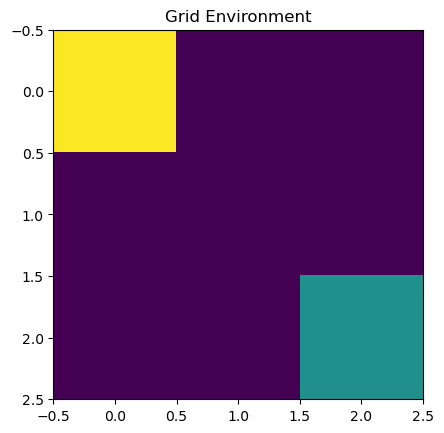

In [50]:
env = GridEnvironment()

terminated, truncated = False, False
obs, info = env.reset()
env.render()

reward:  0


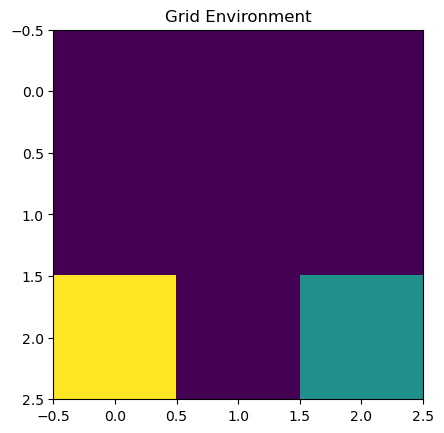

In [56]:
action = 'down'
observation, reward, done, truncated, info = env.step(action)
print("reward: ", reward)
env.render()

reward:  1


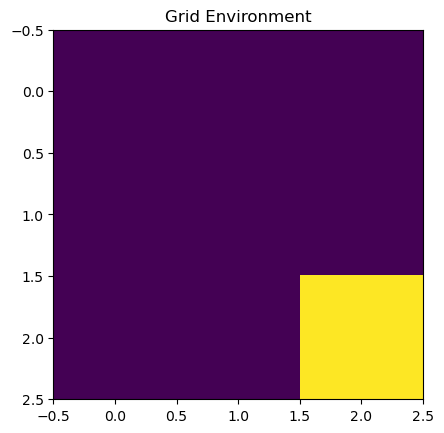

In [63]:
action = 'right'
observation, reward, done, truncated, info = env.step(action)
print("reward: ", reward)
env.render()

reward:  0


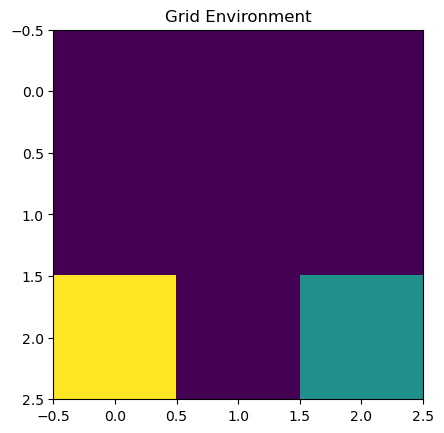

In [59]:
action = 'left'
observation, reward, done, truncated, info = env.step(action)
print("reward: ", reward)
env.render()

In [42]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

Action: 2 , Reward: 0 , Done: False
Action: 2 , Reward: 0 , Done: False
Action: 3 , Reward: 0 , Done: False
Action: 1 , Reward: 0 , Done: False
Action: 1 , Reward: 0 , Done: True


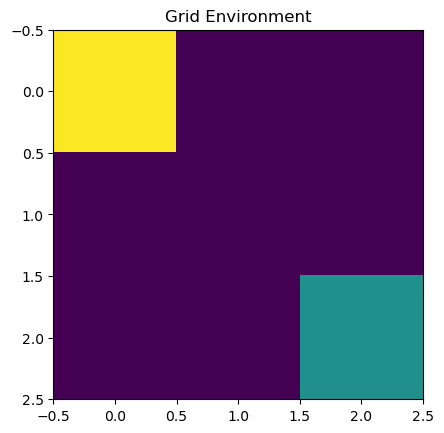

In [43]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs, info = env.reset()
  terminated, truncated = False, False

  while not terminated:
    action = agent.step(obs)
    obs, reward, terminated, truncated, info = env.step(action)
    print('Action:', action, ', Reward:', reward, ', Done:', terminated)
    env.render()

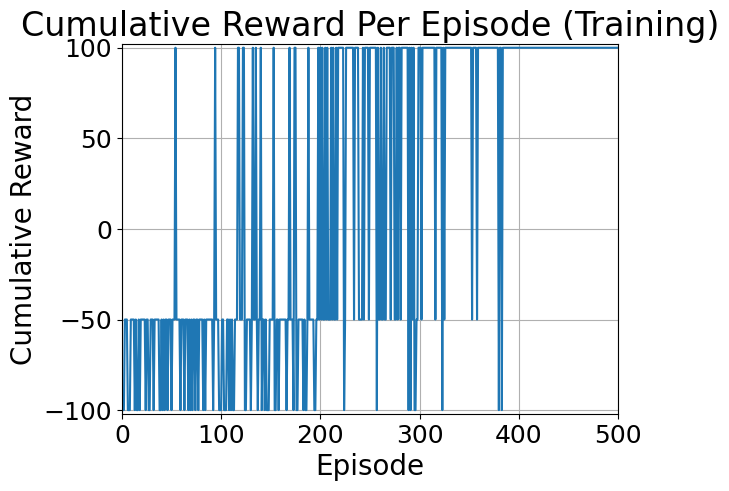

In [44]:
# Generating reward values for sample graph
initial_rewards = np.random.choice([-50, -100, 100], 100, p=[0.7, 0.29, 0.01])
intermediate_rewards = np.random.choice([-50, -100, 100], 100, p=[0.6, 0.25, 0.15])
final_rewards_1 = np.random.choice([-50, -100, 100], 100, p=[0.3, 0.1, 0.6])
final_rewards_2 = np.random.choice([-50, -100, 100], 100, p=[0.05, 0.05, 0.9])
final_rewards_3 = np.random.choice([-50, -100, 100], 100, p=[0.00, 0.00, 1])

reward_per_episode = np.concatenate((initial_rewards, intermediate_rewards,
                                    final_rewards_1, final_rewards_2, final_rewards_3))

# Reward Dynamics: Sample example
plt.figure()
plt.plot(reward_per_episode)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Cumulative Reward', fontsize=20)
plt.title('Cumulative Reward Per Episode (Training)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks([-100, -50, 0, 50, 100], fontsize=18)
plt.ylim(ymin=-102, ymax=102)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()

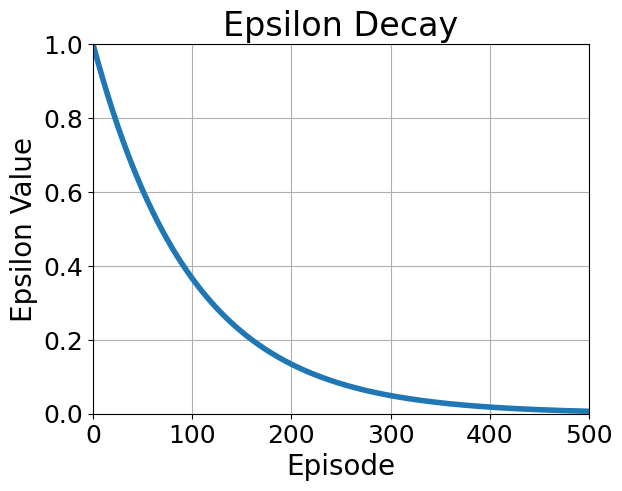

In [45]:
# Generating epsilon values for a sample graph
epsilon_values = [(0.99 ** i) * 1 for i in range(500)]

# Epsilon-decay graph: Sample example
plt.figure()
plt.plot(epsilon_values, linewidth=4)
plt.xlabel('Episode', fontsize=20)
plt.ylabel('Epsilon Value', fontsize=20)
plt.title('Epsilon Decay', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=500)
plt.grid()
plt.show()